In [68]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
#os.chdir('/drive/My Drive/Colab Notebooks/Voice Recognition/')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
data = pd.read_csv('./data.csv')
data.head(3)

,Files,labels,Frequency,Audio_length,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,22050.0,1.70,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,22050.0,1.79,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,22050.0,2.62,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 14 columns):
Files               582 non-null object
labels              582 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 63.7+ KB


In [0]:
data = data.dropna()

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 581
Data columns (total 14 columns):
Files               556 non-null object
labels              556 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 65.2+ KB


In [75]:
data2 = data.drop(['Audio_length','Frequency'],axis=1)
data2.head(3)

,Files,labels,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [76]:
X = data2.iloc[:,2:]
X.keys()

Index(['zcr_mean', 'sp_cen_mean', 'sp_rf_mean', 'mfcc_mean', 'spec_bw_mean',
       'rmse_mean', 'chroma_stft_mean', 'Chromagram', 'MelSpectrohram',
       'Amplitude_db'],
      dtype='object')

In [0]:
Y = data2.labels


In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(X)
x = x+8.474809892871459
x

array([[ 8.59360517,  8.44994422,  8.44952274, ...,  9.06596243,
         7.72763963,  6.88824483],
       [ 9.04348132,  8.83018718,  8.60172668, ...,  8.04584957,
         8.26650381,  8.73178016],
       [ 9.08266367,  8.96774509,  8.98926289, ...,  8.73219353,
         7.83932716,  8.04709983],
       ...,
       [13.40240515, 12.21596497, 10.50494843, ...,  8.91454575,
         7.71013414,  7.20126461],
       [ 8.55114174,  8.32310937,  8.07874333, ...,  9.04723094,
         8.53936913,  8.73336476],
       [ 8.44198314,  8.00915875,  7.95858327, ...,  9.40575812,
         8.09403126,  8.54397593]])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2)

## Gaussian Naive Bayes

In [0]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb_model = gnb.fit(x_train, y_train)



In [82]:
#Predict the response for test dataset
gnb_y_pred = gnb_model.predict(x_test)
gnb_y_pred

array([1, 2, 2, 2, 1, 2, 3, 2, 1, 4, 1, 4, 3, 4, 4, 4, 2, 3, 2, 1, 3, 1,
       4, 2, 1, 2, 1, 4, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 4, 4, 2, 2, 1, 2,
       4, 4, 4, 4, 3, 2, 2, 1, 2, 4, 3, 4, 2, 2, 4, 4, 2, 1, 4, 1, 4, 2,
       2, 3, 2, 4, 2, 1, 2, 4, 2, 2, 1, 2, 1, 4, 2, 4, 4, 2, 4, 1, 1, 1,
       4, 1, 4, 4, 3, 2, 1, 2, 4, 1, 2, 3, 2, 2, 1, 1, 4, 2, 3, 2, 1, 2,
       4, 2])

In [0]:
gnb_y_prob = gnb_model.predict_proba(x_test)

In [0]:
from sklearn import metrics
from sklearn.metrics import accuracy_score , roc_curve, auc, classification_report,cohen_kappa_score

In [85]:
accuracy_score(gnb_y_pred,y_test)

0.5178571428571429

## Classification Report

In [86]:
gnb_cm = classification_report(y_test,gnb_y_pred)
print(gnb_cm)


              precision    recall  f1-score   support

           1       0.48      0.46      0.47        26
           2       0.48      0.91      0.63        23
           3       0.58      0.25      0.35        28
           4       0.58      0.51      0.55        35

    accuracy                           0.52       112
   macro avg       0.53      0.53      0.50       112
weighted avg       0.54      0.52      0.50       112



### Precision:
- Precision is the fraction of predicted positives events that are actually positive
### Recall:
- Recall (also known as sensitivity) is the fraction of positives events that you predicted correctly
### f1-score:
- The f1 score is the harmonic mean of recall and precision, with a higher score as a better model.

### OneHotEncoding : 
- A one hot encoding is a representation of categorical variables as binary vectors.
- This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [88]:
y_test = np.array(y_test).reshape(-1,1)
y_test.shape

(112, 1)

In [89]:
y_true_ohe = ohe.fit_transform(y_test).toarray()
y_true_ohe

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],


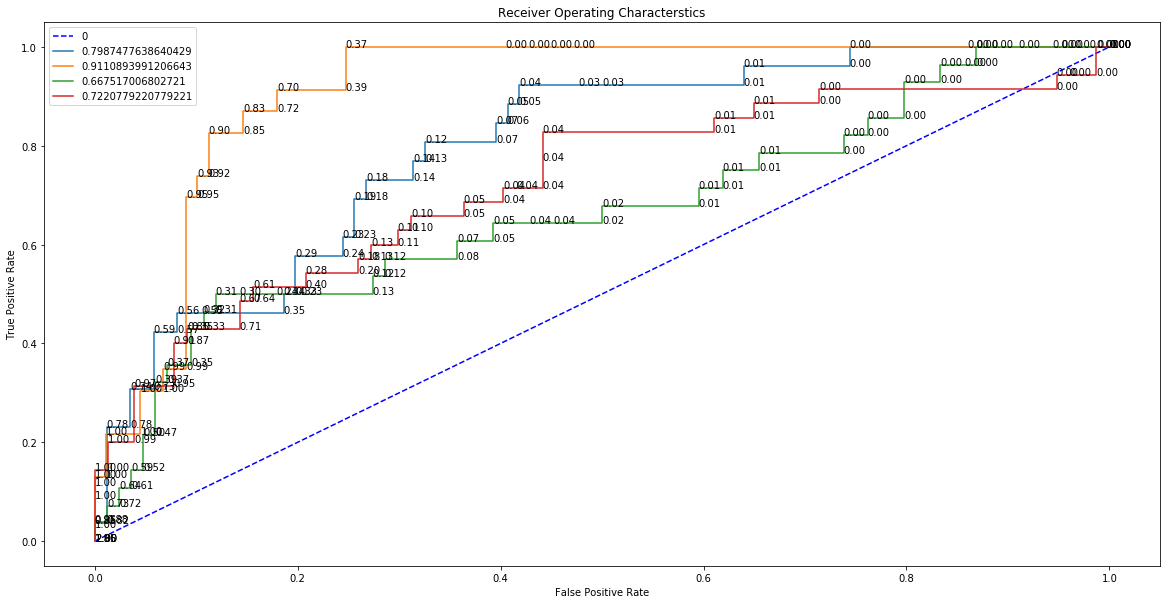

In [90]:
plt.figure(figsize=(20,10))
plt.plot([0,1],[0,1],'b--')
area = [0]

for i in range(4):

    y_true_1 = y_true_ohe[:,i:i+1]
    gnb_y_prob_1 = gnb_y_prob[:,i:i+1]
    fpr, trp, thereshold = roc_curve(y_true_1,gnb_y_prob_1)
    area.append(auc(fpr,trp))
    for j in range(len(fpr)):

        plt.text(fpr[j],trp[j],'%0.2f'%thereshold[j])
        
     
    plt.plot(fpr,trp)
    

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.legend(['Base Line','Others','Bagunava','Namaskaram','Swagatham'])
plt.legend(area)
plt.show()

### Kappa Score

In [91]:
cohen_kappa_score(y_test,gnb_y_pred)

0.36074410738822527

#### From the above kappa value 0.406, is very less to1, so we conclude that model is not good

## Multinomial Naive Bayes

In [92]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb_model = mnb.fit(x_test,y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
mnb_y_pred = mnb_model.predict(x_test)
mnb_y_pred

array([1, 4, 4, 4, 4, 4, 4, 3, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 1, 4, 4, 1, 3, 4, 1, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4,
       4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 4])

In [94]:
accuracy_score(y_test,mnb_y_pred)

0.375

In [95]:
mnb_cr = classification_report(y_test,mnb_y_pred)
print(mnb_cr)

              precision    recall  f1-score   support

           1       0.59      0.38      0.47        26
           2       0.00      0.00      0.00        23
           3       0.57      0.14      0.23        28
           4       0.32      0.80      0.46        35

    accuracy                           0.38       112
   macro avg       0.37      0.33      0.29       112
weighted avg       0.38      0.38      0.31       112



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [96]:
cohen_kappa_score(y_test,mnb_y_pred)

0.11171538635848632

In [97]:
from sklearn.feature_selection import chi2
chi2(x_train,y_train)

(array([ 3.61777409,  4.41250176,  3.70131217,  5.21579359,  2.43873501,
         7.62241885,  0.31812875,  0.456972  ,  4.52261735, 12.80023702]),
 array([0.30580538, 0.22022898, 0.29557574, 0.15666069, 0.48646485,
        0.05449503, 0.95658366, 0.92823752, 0.21028172, 0.00508914]))